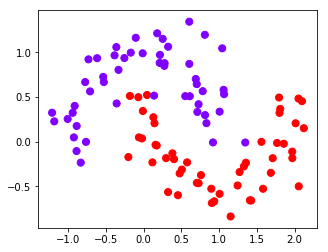

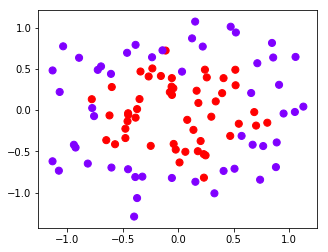

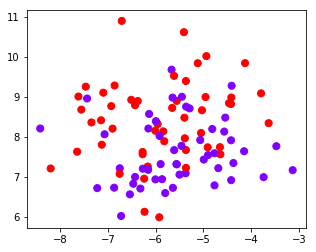

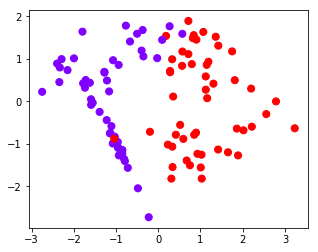

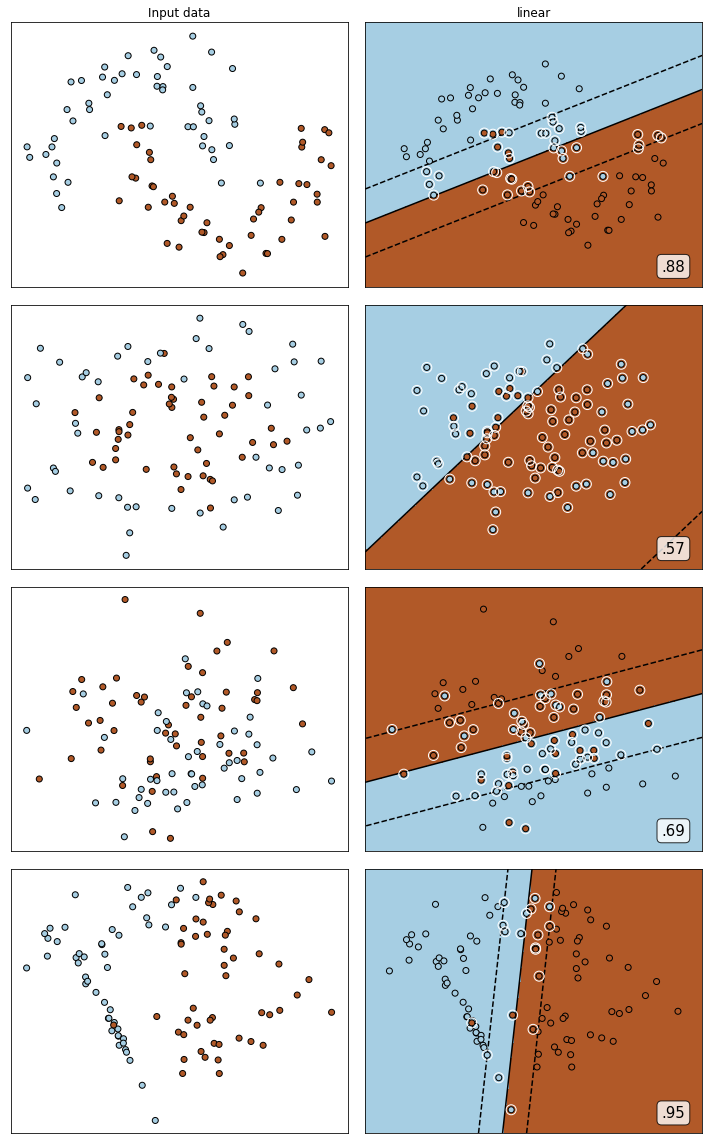

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.datasets import make_circles, make_moons, make_blobs,make_classification
%matplotlib inline

n_samples = 100
datasets = [
        make_moons(n_samples=n_samples, noise=0.2, random_state=0),
        make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
        make_blobs(n_samples=n_samples, centers=2, random_state=5),
        make_classification(n_samples=n_samples,n_features =
        2,n_informative=2,n_redundant=0, random_state=5)
            ]
Kernel = ["linear"]
#四个数据集分别是什么样子呢？
for X,Y in datasets:
    plt.figure(figsize=(5,4))
    plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")
nrows=len(datasets)
ncols=len(Kernel) + 1
fig, axes = plt.subplots(nrows, ncols,figsize=(10,16))

#第一层循环：在不同的数据集中循环
for ds_cnt, (X,Y) in enumerate(datasets):
    ax = axes[ds_cnt, 0]
    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    for est_idx, kernel in enumerate(Kernel):
        ax = axes[ds_cnt, est_idx + 1]
        clf = svm.SVC(kernel=kernel, gamma=2).fit(X, Y)
        score = clf.score(X, Y)
        ax.scatter(X[:, 0], X[:, 1], c=Y
            ,zorder=10
            ,cmap=plt.cm.Paired,edgecolors='k')
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
        facecolors='none', zorder=10, edgecolors='white')
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
        levels=[-1, 0, 1])
        
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(kernel)
        ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0')
            , size=15
            , bbox=dict(boxstyle='round', alpha=0.8, facecolor='white')
            #为分数添加一个白色的格子作为底色
            , transform=ax.transAxes #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
            , horizontalalignment='right' #位于坐标轴的什么方向
            )
plt.tight_layout()
plt.show()

##   二分类SVC中的样本不均衡问题：重要参数class_weight

SVC的参数：class_weight

SVC的接口fit的参数：sample_weight

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


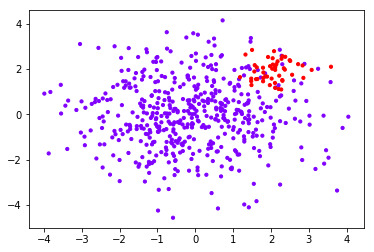

In [3]:
class_1 = 500 #类别1有500个样本
class_2 = 50 #类别2只有50个
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [1.5, 0.5] #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散
X, y = make_blobs(n_samples=[class_1, class_2],
                centers=centers,
                cluster_std=clusters_std,
                random_state=0, shuffle=False)
#看看数据集长什么样
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10)
#其中红色点是少数类，紫色点是多数类

In [4]:
#  在数据集上分别进行建模
#不设定class_weight
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [5]:
#  设定 权重的匹配
wclf = svm.SVC(kernel="linear",class_weight={1:10})
wclf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight={1: 10}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [6]:
#   两个模型  分别打分看看
clf.score(X,y)

0.9418181818181818

In [7]:
wclf.score(X,y)

0.9127272727272727

## 绘制两个模型下数据的决策边界

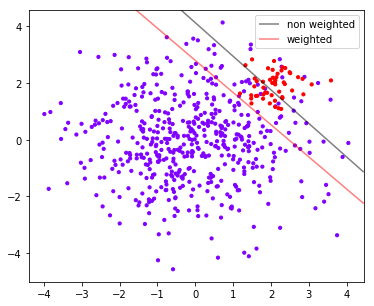

In [8]:
#首先要有数据分布
plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10)
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图
#绘制决策边界的第一步：要有网格

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
#第二步：找出我们的样本点到决策边界的距离
Z_clf = clf.decision_function(xy).reshape(XX.shape)
a = ax.contour(XX, YY, Z_clf, colors='black', levels=[0], alpha=0.5, linestyles=['-'])
Z_wclf = wclf.decision_function(xy).reshape(XX.shape)
b = ax.contour(XX, YY, Z_wclf, colors='red', levels=[0], alpha=0.5, linestyles=['-'])
#第三步：画图例
plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],
loc="upper right")
plt.show()




In [9]:
#所有判断正确并确实为1的样本 / 所有被判断为1的样本
#对于没有class_weight，没有做样本平衡的灰色决策边界来说：
(y[y == clf.predict(X)] == 1).sum()/(clf.predict(X) == 1).sum()


0.7142857142857143

In [10]:
#对于有class_weight，做了样本平衡的红色决策边界来说：
(y[y == wclf.predict(X)] == 1).sum()/(wclf.predict(X) == 1).sum()

0.5102040816326531

In [11]:
#  召回率的计算

In [12]:
(y[y == clf.predict(X)] == 1).sum()/(y==1).sum()

0.6

In [13]:
(y[y == wclf.predict(X)] == 1).sum()/(y==1).sum()

1.0

##   召回率和精确率的简单计算

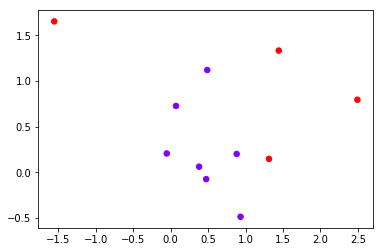

In [14]:
# 自建数据集
class_1_ = 7
class_2_ = 4
centers_ = [[0.0,0.0],[1,1]]
clusters_std_ = [0.5,1]
X_,y_ = make_blobs(n_samples=[class_1_, class_2_],
                  centers=centers_,
                  cluster_std=clusters_std_,
                  random_state=0, shuffle=False)
plt.scatter(X_[:,0],X_[:,1],
           c=y_, cmap="rainbow",s=30)

In [15]:
# 建模，调用概率
from sklearn.linear_model import LogisticRegression as LogIR
clf_lo = LogIR().fit(X_,y_)
prob = clf_lo.predict_proba(X_)
prob

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[0.60466356, 0.39533644],
       [0.45891589, 0.54108411],
       [0.71798647, 0.28201353],
       [0.67910911, 0.32089089],
       [0.66473898, 0.33526102],
       [0.56277457, 0.43722543],
       [0.66205409, 0.33794591],
       [0.35516738, 0.64483262],
       [0.38160618, 0.61839382],
       [0.58528378, 0.41471622],
       [0.50149311, 0.49850689]])

In [16]:
# 将样本和概率  放到一个DataFrame中，方便进行计算
import pandas as pd
prob = pd.DataFrame(prob)

In [17]:
prob

,0,1
0,0.604664,0.395336
1,0.458916,0.541084
2,0.717986,0.282014
3,0.679109,0.320891
4,0.664739,0.335261
5,0.562775,0.437225
6,0.662054,0.337946
7,0.355167,0.644833
8,0.381606,0.618394
9,0.585284,0.414716


In [18]:
prob.columns = ["0","1"]
prob

,0,1
0,0.604664,0.395336
1,0.458916,0.541084
2,0.717986,0.282014
3,0.679109,0.320891
4,0.664739,0.335261
5,0.562775,0.437225
6,0.662054,0.337946
7,0.355167,0.644833
8,0.381606,0.618394
9,0.585284,0.414716


In [19]:
prob.shape

(11, 2)

使用阈值0.5，大于0.5的样本被预测为1，小于0.5的样本被预测为0

In [20]:
#  手动调节阈值，来改变我们的模型效果
for i in range(prob.shape[0]):
    if prob.loc[i,"1"] > 0.5:
        prob.loc[i,"pred"] = 1
    else:
        prob.loc[i,"pred"] = 0
prob["y_true"] = y_
prob

,0,1,pred,y_true
0,0.604664,0.395336,0.0,0
1,0.458916,0.541084,1.0,0
2,0.717986,0.282014,0.0,0
3,0.679109,0.320891,0.0,0
4,0.664739,0.335261,0.0,0
5,0.562775,0.437225,0.0,0
6,0.662054,0.337946,0.0,0
7,0.355167,0.644833,1.0,1
8,0.381606,0.618394,1.0,1
9,0.585284,0.414716,0.0,1


In [21]:
prob = prob.sort_values(by="1",ascending=False)
prob

,0,1,pred,y_true
7,0.355167,0.644833,1.0,1
8,0.381606,0.618394,1.0,1
1,0.458916,0.541084,1.0,0
10,0.501493,0.498507,0.0,1
5,0.562775,0.437225,0.0,0
9,0.585284,0.414716,0.0,1
0,0.604664,0.395336,0.0,0
6,0.662054,0.337946,0.0,0
4,0.664739,0.335261,0.0,0
3,0.679109,0.320891,0.0,0


In [22]:
#   使用混淆矩阵看看 结果
from sklearn.metrics import confusion_matrix as CM, precision_score as PS, recall_score as R



In [23]:
CM(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])


array([[2, 2],
       [1, 6]], dtype=int64)

In [24]:
PS(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])


0.6666666666666666

In [25]:
R(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])


0.5

In [26]:
#  假如我们使用 0.5  作为阈值的话
for i in range(prob.shape[0]):
    if prob.loc[i,"1"] > 0.4:
        prob.loc[i,"pred"] = 1
    else:
        prob.loc[i,"pred"] = 0

In [27]:
CM(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])


array([[4, 0],
       [2, 5]], dtype=int64)

In [28]:
PS(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])


0.6666666666666666

In [29]:
R(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

1.0

## SVM实现概率预测：重要参数probability，接口predict_proba以及decision_function

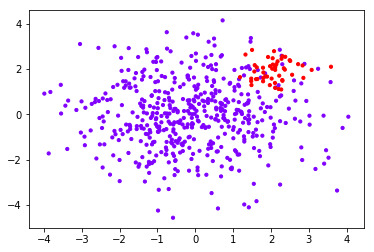

In [31]:
#  使用最初的X和y，样本不均衡的这个模型
class_1 = 500
class_2 = 50
centers = [[0.0, 0.0],[2.0,2.0]]  # 设定两个类别中心
clusters_std = [1.5, 0.5]
X,y = make_blobs(n_samples=[class_1, class_2],
                centers=centers,
                cluster_std=clusters_std,
                random_state=0, shuffle=False)
plt.scatter(X[:,0],X[:,1],c=y,cmap="rainbow",s=10)

In [34]:
clf_proba = svm.SVC(kernel="linear",C=1.0,probability=True).fit(X,y)
clf_proba

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [35]:
clf_proba.predict_proba(X)

array([[0.68823413, 0.31176587],
       [0.27937758, 0.72062242],
       [0.95912849, 0.04087151],
       ...,
       [0.17060077, 0.82939923],
       [0.36887595, 0.63112405],
       [0.33151508, 0.66848492]])

In [36]:
clf_proba.predict_proba(X).shape

(550, 2)

In [39]:
sum(clf_proba.decision_function(X)>0)

42

In [40]:
clf_proba.decision_function(X).shape

(550,)

绘制 SVM 的ROC 曲线

In [41]:
prob

,0,1,pred,y_true
7,0.355167,0.644833,1.0,1
8,0.381606,0.618394,1.0,1
1,0.458916,0.541084,1.0,0
10,0.501493,0.498507,1.0,1
5,0.562775,0.437225,1.0,0
9,0.585284,0.414716,1.0,1
0,0.604664,0.395336,0.0,0
6,0.662054,0.337946,0.0,0
4,0.664739,0.335261,0.0,0
3,0.679109,0.320891,0.0,0


In [42]:
#  首先 看看如何从混淆矩阵中 获取  FPR 和 Recall
cm = CM(prob.loc[:,"y_true"], prob.loc[:,"pred"], labels=[1,0])
cm

array([[4, 0],
       [2, 5]], dtype=int64)

In [43]:
#  FPR 
cm[1,0]/cm[1,:].sum()

0.2857142857142857

In [44]:
#  recall  
cm[0,0]/cm[0,:].sum()

1.0

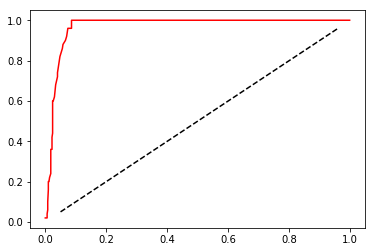

In [48]:
#  开始绘图
probrange = np.linspace(clf_proba.predict_proba(X)[:,1].min(),
                        clf_proba.predict_proba(X)[:,1].max(),num=50,endpoint=False)
from sklearn.metrics import confusion_matrix as CM, recall_score as R
import matplotlib.pyplot as plot

recall = []
FPR = []

for i in probrange:
    y_predict = []
    for j in range(X.shape[0]):
        if clf_proba.predict_proba(X)[j,1] > i:
            y_predict.append(1)
        else:
            y_predict.append(0)
    cm = CM(y,y_predict,labels=[1,0])
    recall.append(cm[0,0]/cm[0,:].sum())
    FPR.append(cm[1,0]/cm[1,:].sum())

recall.sort()
FPR.sort()
plt.plot(FPR,recall,c="red")
plt.plot(probrange+0.05,probrange+0.05,c="black",linestyle="--")
plt.show()

array([[  1,  49],
       [  0, 500]], dtype=int64)

sklearn 中的 ROC 曲线和AUC面积


In [51]:
from sklearn.metrics import roc_curve
FPR, recall, thresholds = roc_curve(y,clf_proba.decision_function(X),pos_label=1)
FPR

array([0.   , 0.   , 0.006, 0.006, 0.008, 0.008, 0.01 , 0.01 , 0.014,
       0.014, 0.018, 0.018, 0.022, 0.022, 0.024, 0.024, 0.028, 0.028,
       0.03 , 0.03 , 0.032, 0.032, 0.036, 0.036, 0.04 , 0.04 , 0.042,
       0.042, 0.044, 0.044, 0.05 , 0.05 , 0.054, 0.054, 0.058, 0.058,
       0.066, 0.066, 0.072, 0.072, 0.074, 0.074, 0.086, 0.086, 1.   ])

In [52]:
recall

array([0.  , 0.02, 0.02, 0.06, 0.06, 0.16, 0.16, 0.2 , 0.2 , 0.22, 0.22,
       0.36, 0.36, 0.42, 0.42, 0.6 , 0.6 , 0.62, 0.62, 0.64, 0.64, 0.68,
       0.68, 0.7 , 0.7 , 0.74, 0.74, 0.76, 0.76, 0.82, 0.82, 0.84, 0.84,
       0.86, 0.86, 0.88, 0.88, 0.92, 0.92, 0.94, 0.94, 0.96, 0.96, 1.  ,
       1.  ])

In [53]:
thresholds

array([  3.18236076,   2.18236076,   1.48676267,   1.35964325,
         1.33920817,   1.14038015,   1.13383091,   1.00003406,
         0.85085628,   0.84476439,   0.78571364,   0.60568093,
         0.5389064 ,   0.46718521,   0.44396046,   0.03907036,
        -0.07011269,  -0.10668727,  -0.1258212 ,  -0.13845693,
        -0.14034183,  -0.16790648,  -0.2040958 ,  -0.22137683,
        -0.24381463,  -0.26762451,  -0.34446784,  -0.3467975 ,
        -0.39182241,  -0.40676459,  -0.4589064 ,  -0.46310299,
        -0.49195707,  -0.5088941 ,  -0.53560561,  -0.55152081,
        -0.62628865,  -0.67580418,  -0.78127198,  -0.79874442,
        -0.88438995,  -0.91257798,  -1.01417607,  -1.08601917,
       -10.31959605])

AUC面积的分数使用以上类来进行计算，输入的参数也比较简单，就是真实标签，和与roc_curve中一致的置信度
分数或者概率值。

In [54]:
from sklearn.metrics import roc_auc_score as AUC
area = AUC(y,clf_proba.decision_function(X))
area

0.9696400000000001

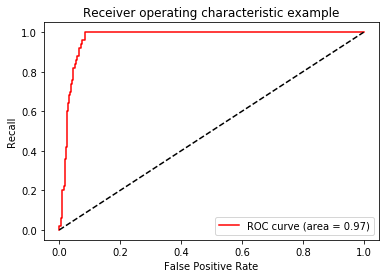

In [55]:
plt.figure()
plt.plot(FPR, recall, color='red',
label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

 利用ROC曲线找出最佳阈值

In [56]:
maxindex = (recall - FPR).tolist().index(max(recall - FPR))
thresholds[maxindex]

-1.0860191749391461

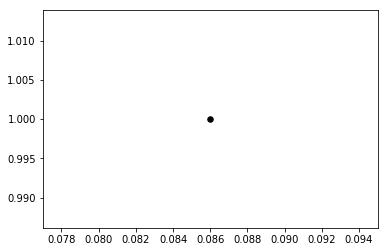

In [57]:
plt.scatter(FPR[maxindex],recall[maxindex],c="black",s=30)

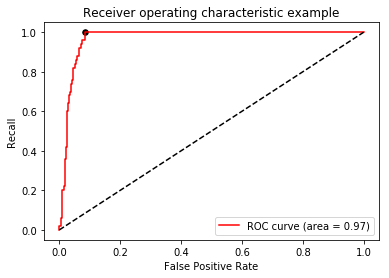

In [58]:
#把上述代码放入这段代码中：
plt.figure()
plt.plot(FPR, recall, color='red',
label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.scatter(FPR[maxindex],recall[maxindex],c="black",s=30)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## 使用SVC时的其他考虑